MAGIC GAMMA TELESCOPE 

DATASET = https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Adding column names to raw dataset

In [3]:
cols=["fLength","fwidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic+gamma+telescope/magic04.data",names=cols)
df.head()

,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Setting class column as 0's and 1's

In [4]:
df["class"] = (df["class"] != "g").astype(int)

In [5]:
df.head()

,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


                                        #SUPERVISED LEARNING


QUALITATIVE - Categorical data (finite number of categories or groups)
        NOMINAL DATA :- No inherent order (gender, flags)
               ONE HOT ENCODING :-
                                USA                     [1,0,0,0]
                                INDIA                   [0,1,0,0]
                                CANADA                  [0,0,1,0]
                                FRANCE                  [0,0,0,1]
        
        ORDINAL DATA :- Inherent order (age groups, reviews)

QUANTITATIVE - Numerical valued data (discrete or continuous)


These features go into feature vector 


SUPERVISED LEARNING TASKS :- 
                        Classification - predict discrete classes L
                                        Binary classification :- only 2 classes
                                        Multiclass classification :- classifies among more than 2 classes

                        Regression - predict continuous values(price of house, price of a stock tomorrow)

Training data,Validation data,Test data


METRICS OF PERFORMANCE :-
                LOSS - Difference between predicted value and actual value

                        LOSS FUNCTIONS:-
                                L1 Loss  :-   loss =sum(|y_real - y_predicted|)
                                l2 Loss  :-   loss= sum((y_real - y_predicted)^2) 
                                Binary Cross Entropy Loss  :-  1/N*sum(y_real*log(y_predicted)+(1-y_real)*log((1-y_predicted))) 


                        (Loss inversely prop to performance)

                ACCURACY - percentage of correct predictions                                  

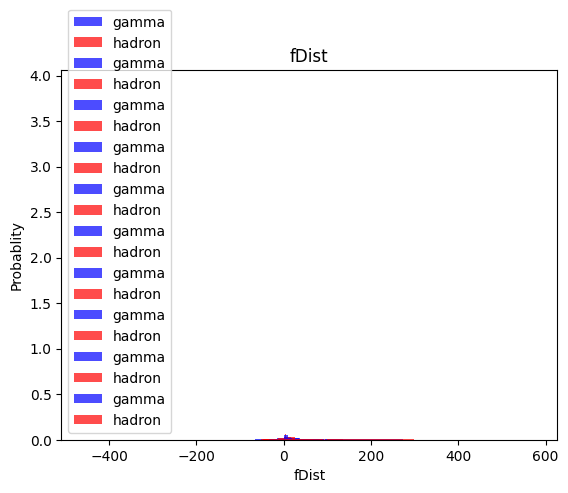

In [7]:
for label in cols[:-1]:
        plt.hist(df[df["class"]==0][label],color='blue',label='gamma',alpha=0.7,density=True)
        plt.hist(df[df["class"]==1][label],color='red',label='hadron',alpha=0.7,density=True)
        plt.title(label)
        plt.ylabel("Probablity")
        plt.xlabel(label)
        plt.legend()
        # plt.show()

# Train, Validation, Test datasets

In [37]:
train, validation, test=np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [3]:
def scale_dataset(dataframe,oversample=False):
        X=dataframe[dataframe.columns[:-1]].values
        y=dataframe[dataframe.columns[-1]].values

        scaler =StandardScaler()
        X=scaler.fit_transform(X)

        # since amount of data for hadron is less than that for gamma so we will oversample it for equity
        
        if oversample:
                ros=RandomOverSampler()
                X, y =ros.fit_resample(X, y)
        
        data=np.hstack((X,np.reshape(y, (-1,1))))

        return data,X,y